In [250]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from utils import benford

# Benfords Law Histogram

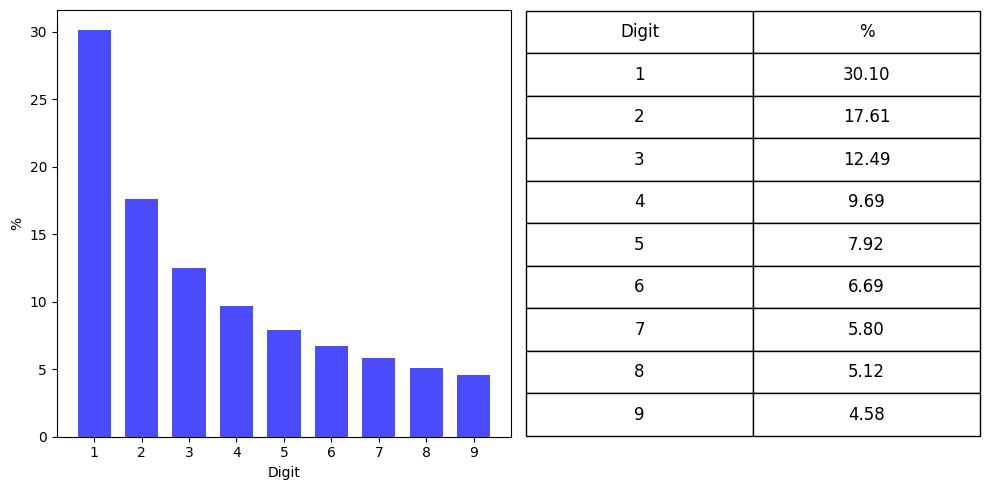

In [231]:
x = [i for i in range(1, 10)]
hist_bl = [benford(i) for i in x]
hist_percent = np.array(hist_bl) * 100

# Histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(x, hist_percent, color='blue', alpha=0.7, width=0.7)
plt.xticks(np.arange(1, 10, step=1))
plt.xlabel('Digit')
plt.ylabel('%')

# Table
plt.subplot(1, 2, 2)
ax = plt.gca()
ax.axis('off')  # Turn off axis
table_data = {'digit': x, 'percentage': np.round(hist_percent, 2)}  # Rounded for display

# Convert the table data to a format suitable for cellText - a list of lists, each representing a row
cell_text = [[str(table_data['digit'][i]), "{:.2f}".format(table_data['percentage'][i])] for i in range(len(table_data['digit']))]

# Create the table
table = ax.table(cellText=cell_text,
                 colLabels=['Digit', '%'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[.5]*2
                 )
table.set_fontsize(12)
table.scale(1, 2.3)
table.set_fontsize(12)

plt.tight_layout()
plt.show()

# Histogram of the original image

In [232]:
img_org = cv.imread('./images/narodziny/org.jpg')
img_org = cv.cvtColor(img_org, cv.COLOR_BGR2GRAY)
hist_org = cv.calcHist([img_org], [0], None, [10], [0, 256])
hist_org = (np.array(hist_org) / np.sum(hist_org))

# Histogram of the generated image

In [233]:
img_gen = cv.imread('./images/narodziny/gen.png')
img_gen = cv.cvtColor(img_gen, cv.COLOR_BGR2GRAY)
hist_gen = cv.calcHist([img_gen], [0], None, [10], [0, 256])
hist_gen = (np.array(hist_gen) / np.sum(hist_gen))

# Histograms plot

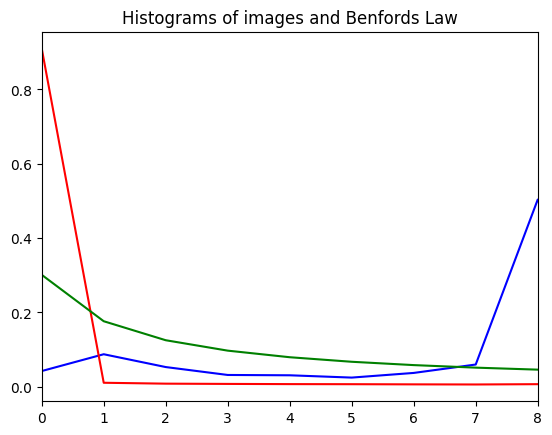

In [234]:
plt.plot(hist_org, color='blue')
plt.plot(hist_gen, color='red')
plt.plot(hist_bl, color='green')
plt.title('Histograms of images and Benfords Law')
plt.xlim([0, 8])

plt.show()

# Compare original to Benford's Law

In [235]:
p = 3
dTotal = np.sum(np.power(hist_org - hist_bl, p))
dMax = np.power(1 - hist_bl[0], p) + np.sum(np.power(hist_bl[1::], p))

print((dMax - dTotal) / dMax)


-0.24629333152112876


# Compare generated to Benford's Law

In [236]:
dTotal = np.sum(np.power(hist_gen - hist_bl, p))

print((dMax - dTotal) / dMax)

-11.61296129050454


# Compare image where there is nothing in particular

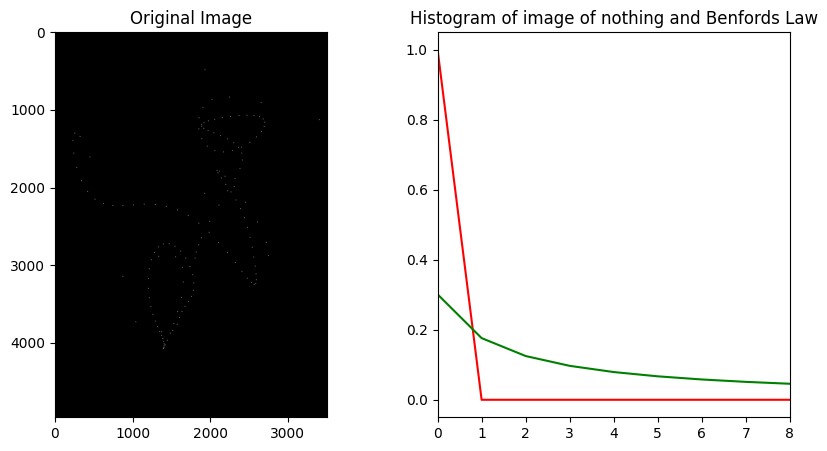

Generated's Mbl
-16.424950613225473


In [237]:
img_gen = cv.imread('./images/nothing/gen3.png')
img_gen = cv.cvtColor(img_gen, cv.COLOR_BGR2GRAY)
hist_gen = cv.calcHist([img_gen], [0], None, [10], [0, 256])
hist_gen = (np.array(hist_gen) / np.sum(hist_gen))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_gen, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.plot(hist_gen, color='red')
plt.plot(hist_bl, color='green')
plt.title('Histogram of image of nothing and Benfords Law')
plt.xlim([0, 8])

plt.show()

print('Generated\'s Mbl')
dTotal = np.sum(np.power(hist_gen - hist_bl, p))
print((dMax - dTotal) / dMax)

# Compare the rest of images

In [238]:
images = ['mak', 'miasto', 'paz', 'zulu', 'skazany']

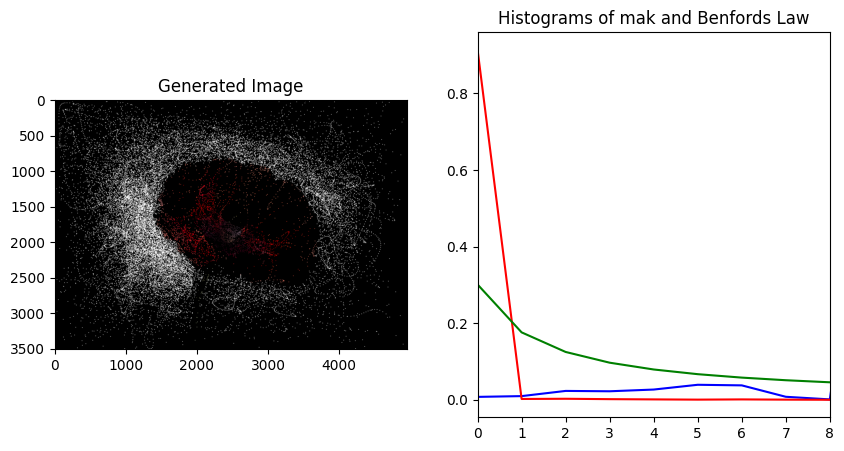

Original's Mbl
-7.876971709193238
Generated's Mbl
-11.752523281029799


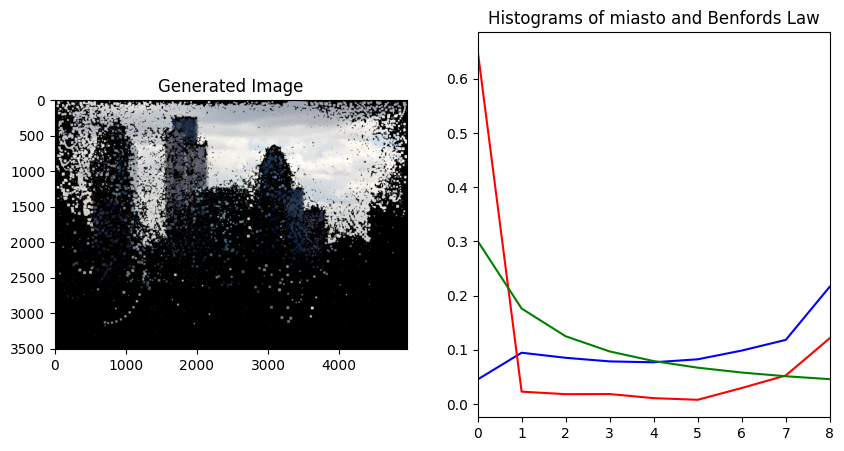

Original's Mbl
1.2131876845643856
Generated's Mbl
-2.7256726797490534


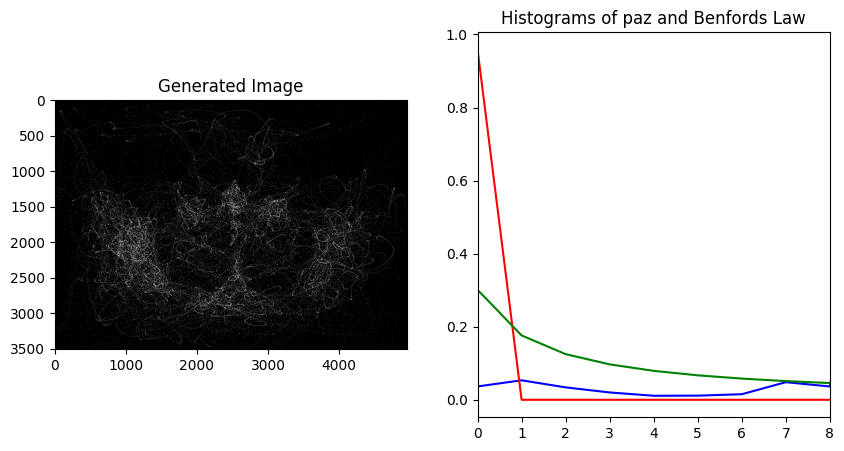

Original's Mbl
-4.829542524059893
Generated's Mbl
-14.05078324193852


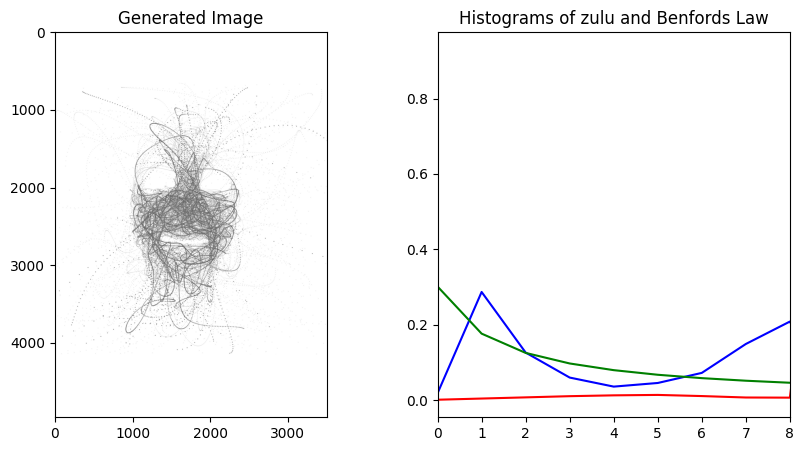

Original's Mbl
1.1479742314341423
Generated's Mbl
-12.5604904289407


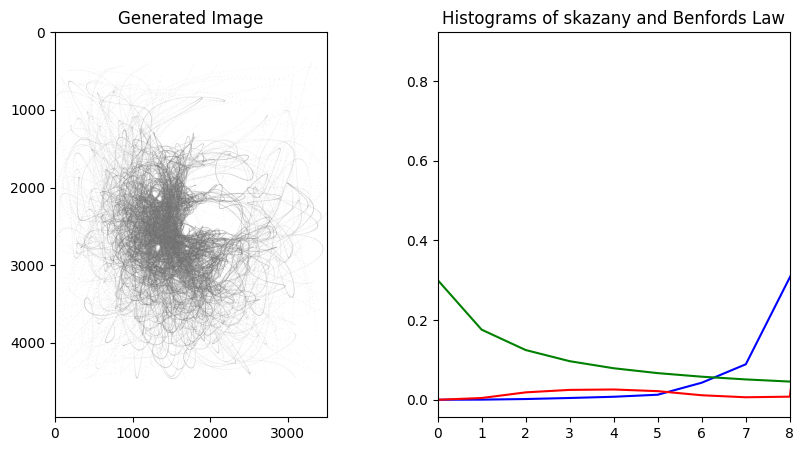

Original's Mbl
-0.689359470813745
Generated's Mbl
-10.14578811071884


In [239]:
for image in images:
    img_gen = cv.imread(f"./images/{image}/gen.png")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(img_gen, cv.COLOR_BGR2RGB))
    plt.title('Generated Image')

    img_gen = cv.cvtColor(img_gen, cv.COLOR_BGR2GRAY)
    hist_gen = cv.calcHist([img_gen], [0], None, [10], [0, 256])
    hist_gen = (np.array(hist_gen) / np.sum(hist_gen))

    img_org = cv.imread(f"./images/{image}/org.png")
    img_org = cv.cvtColor(img_org, cv.COLOR_BGR2GRAY)
    hist_org = cv.calcHist([img_org], [0], None, [10], [0, 256])
    hist_org = (np.array(hist_org) / np.sum(hist_org))

    plt.subplot(1, 2, 2)
    plt.plot(hist_org, color='blue')
    plt.plot(hist_gen, color='red')
    plt.plot(hist_bl, color='green')
    plt.title(f"Histograms of {image} and Benfords Law")
    plt.xlim([0, 8])

    plt.show()

    print('Original\'s Mbl')
    dTotal = np.sum(np.power(hist_org - hist_bl, p))
    print((dMax - dTotal) / dMax)

    print('Generated\'s Mbl')
    dTotal = np.sum(np.power(hist_gen - hist_bl, p))
    print((dMax - dTotal) / dMax)


## Leonardo Da Vinci's "Mona Lisa"

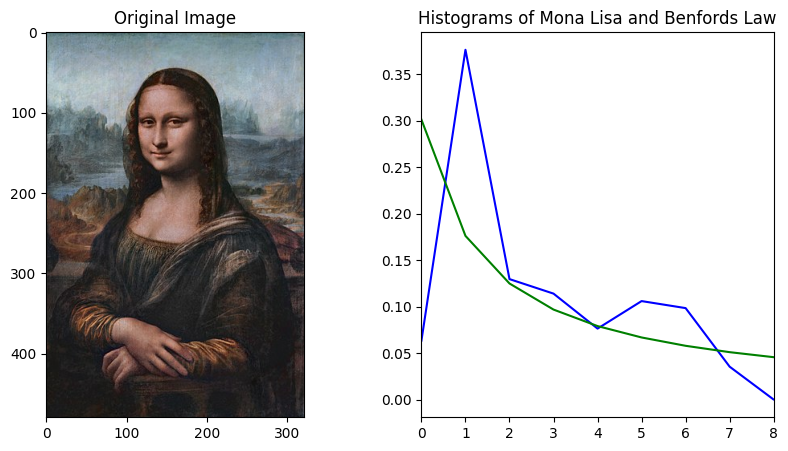

Mona Lisa's Mbl
0.8410707158042485


In [240]:
img = cv.imread(f"./images/compare/monalisa.jpg")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
hist = cv.calcHist([img], [0], None, [10], [0, 256])
hist = (np.array(hist) / np.sum(hist))

plt.subplot(1, 2, 2)
plt.plot(hist, color='blue')
plt.plot(hist_bl, color='green')
plt.title(f"Histograms of Mona Lisa and Benfords Law")
plt.xlim([0, 8])

plt.show()

print('Mona Lisa\'s Mbl')
dTotal = np.sum(np.power(hist - hist_bl, p))
print((dMax - dTotal) / dMax)

## Piet Mondrian's - "Line Over Form"

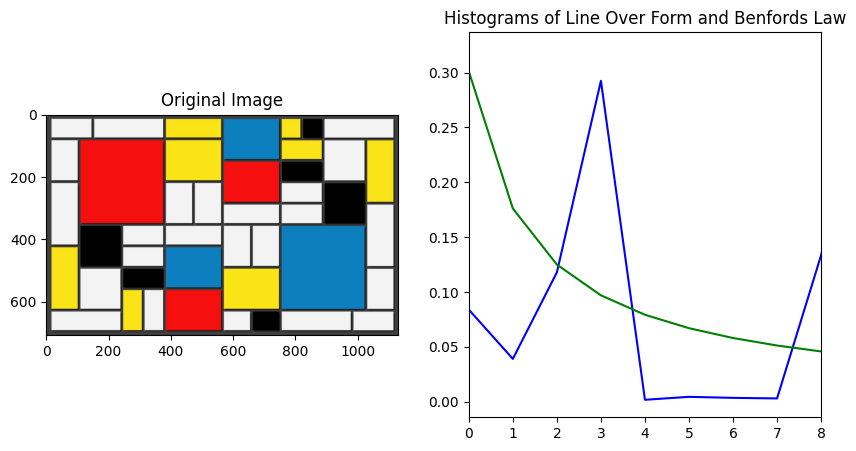

Line Over Form's Mbl
0.9823231236755364


In [241]:
img = cv.imread(f"./images/compare/line_over_form.jpg")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
hist = cv.calcHist([img], [0], None, [10], [0, 256])
hist = (np.array(hist) / np.sum(hist))

plt.subplot(1, 2, 2)
plt.plot(hist, color='blue')
plt.plot(hist_bl, color='green')
plt.title(f"Histograms of Line Over Form and Benfords Law")
plt.xlim([0, 8])

plt.show()

print('Line Over Form\'s Mbl')
dTotal = np.sum(np.power(hist - hist_bl, p))
print((dMax - dTotal) / dMax)

## Vasili Kandinsky's "White Center"

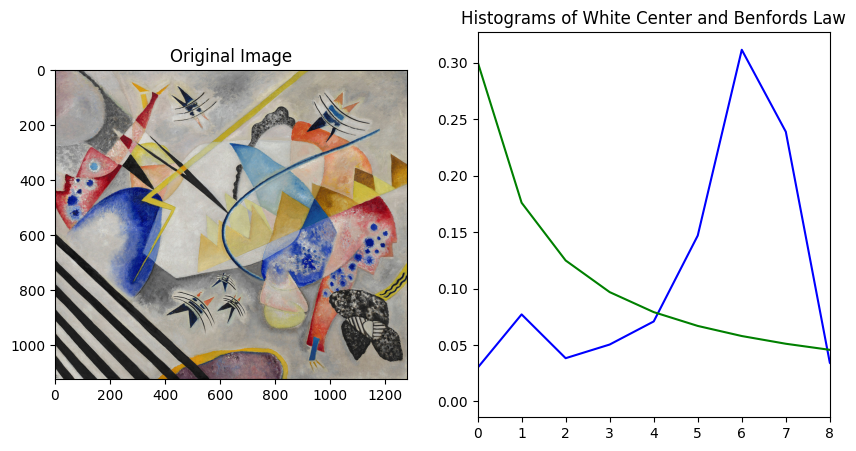

White Center's Mbl
1.0488168888891143


In [242]:
img = cv.imread(f"./images/compare/white_center.jpg")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
hist = cv.calcHist([img], [0], None, [10], [0, 256])
hist = (np.array(hist) / np.sum(hist))

plt.subplot(1, 2, 2)
plt.plot(hist, color='blue')
plt.plot(hist_bl, color='green')
plt.title(f"Histograms of White Center and Benfords Law")
plt.xlim([0, 8])

plt.show()

print('White Center\'s Mbl')
dTotal = np.sum(np.power(hist - hist_bl, p))
print((dMax - dTotal) / dMax)

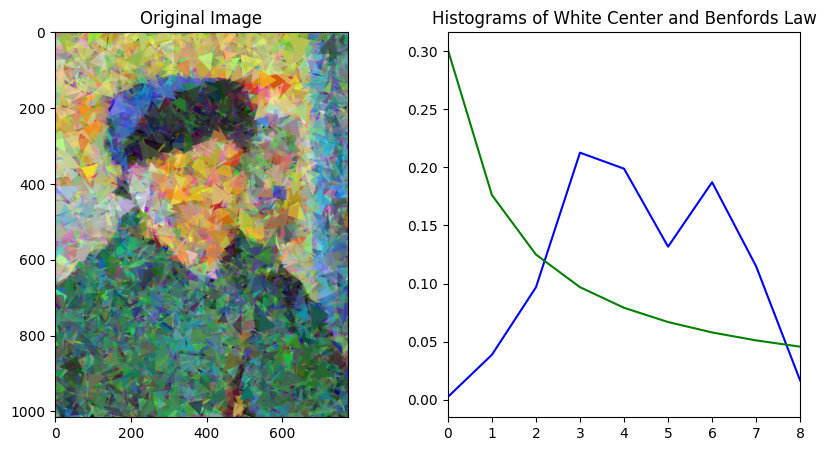

White Center's Mbl
1.2765437454182667


In [243]:
img = cv.imread(f"./images/compare/ucho.png")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
hist = cv.calcHist([img], [0], None, [10], [0, 256])
hist = (np.array(hist) / np.sum(hist))

plt.subplot(1, 2, 2)
plt.plot(hist, color='blue')
plt.plot(hist_bl, color='green')
plt.title(f"Histograms of White Center and Benfords Law")
plt.xlim([0, 8])

plt.show()

print('White Center\'s Mbl')
dTotal = np.sum(np.power(hist - hist_bl, p))
print((dMax - dTotal) / dMax)

# Rating 224 randomly generated images

In [244]:
number_of_files = 223
ratings = []

for i in range(1, number_of_files + 1):
    img = cv.imread(f"./random-tries/{i}.png")
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    hist = cv.calcHist([img], [0], None, [10], [0, 256])
    hist = (np.array(hist) / np.sum(hist))

    dTotal = np.sum(np.power(hist - hist_bl, p))
    ratings.append({"rating": ((dMax - dTotal) / dMax), "hist": hist})

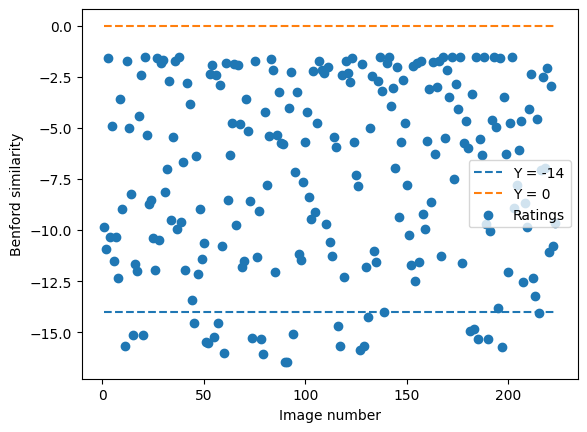

In [245]:
# Generate X values
x_values = np.arange(1, number_of_files + 1)
benford_values = [d['rating'] for d in ratings]
# Plotting
plt.plot(x_values, np.full_like(x_values, -14), label='Y = -14', linestyle='--')
plt.plot(x_values, np.full_like(x_values, 0), label='Y = 0', linestyle='--')
plt.scatter(x_values, benford_values, label='Ratings')

# Adding labels and legend
plt.xlabel('Image number')
plt.ylabel('Benford similarity')
plt.legend()

# Show the plot
plt.show()

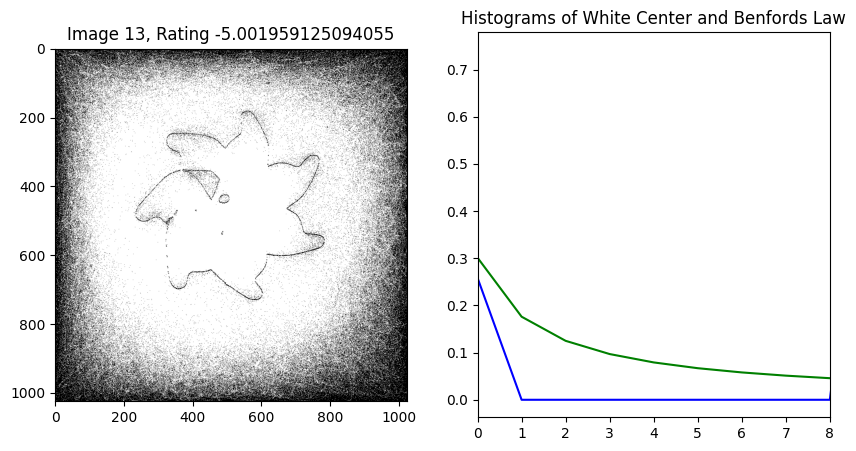

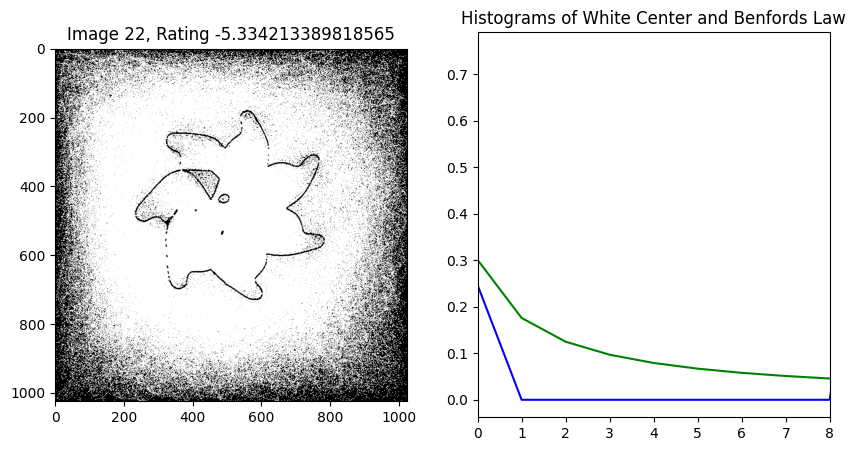

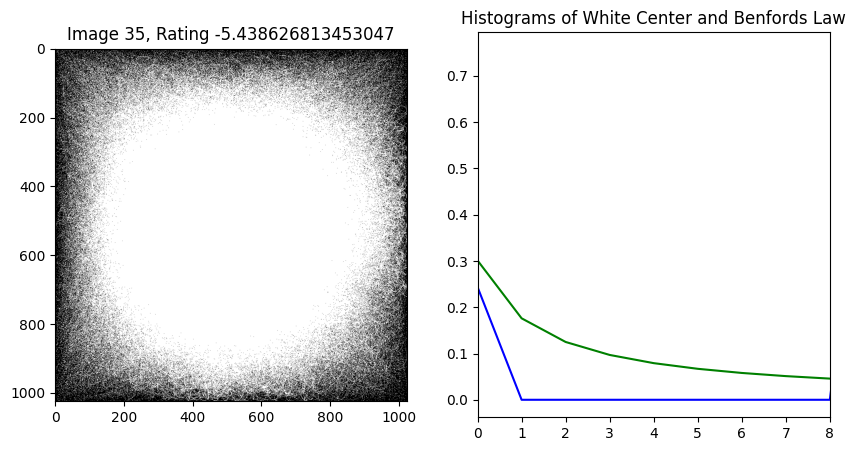

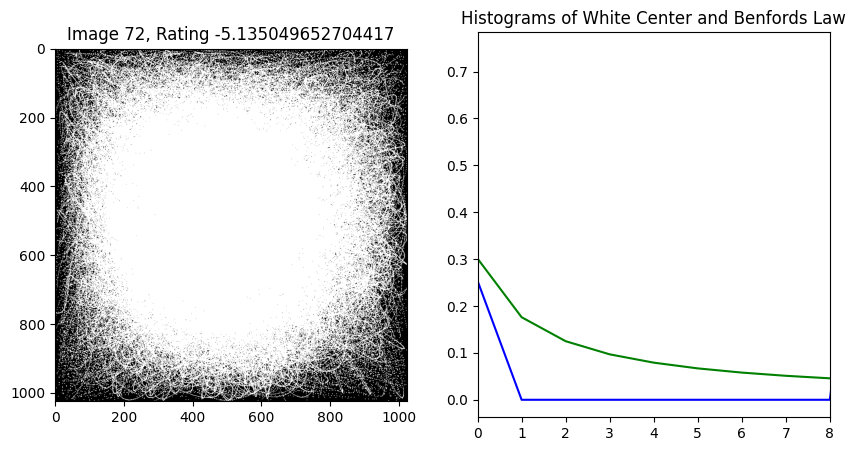

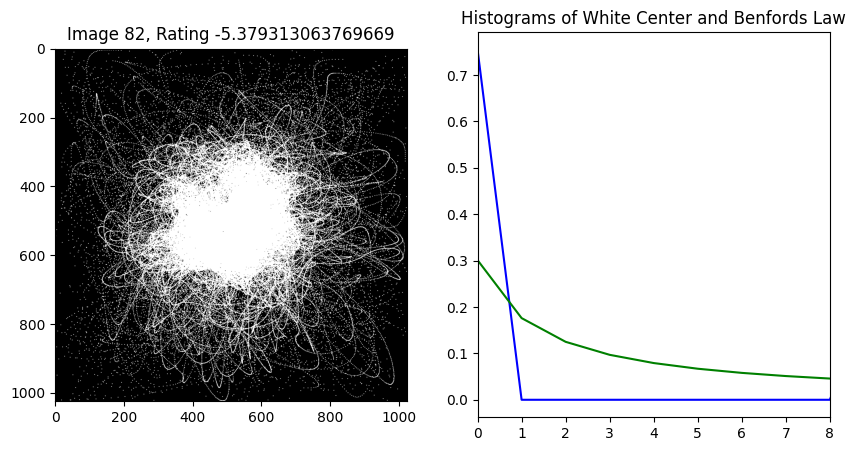

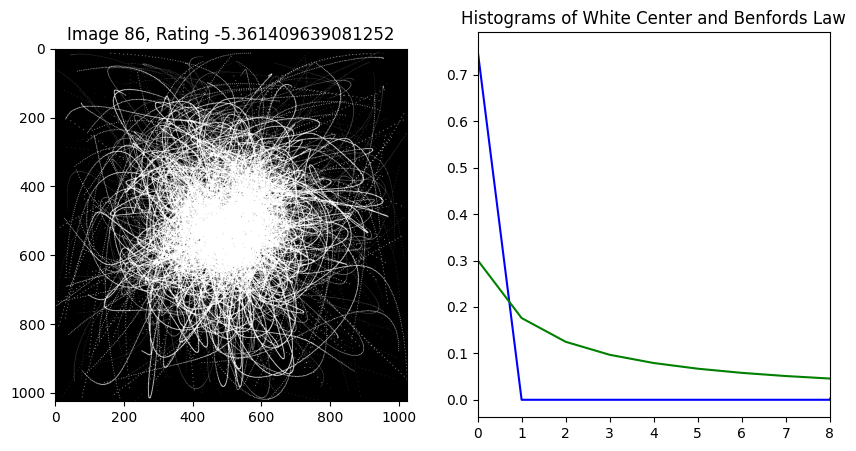

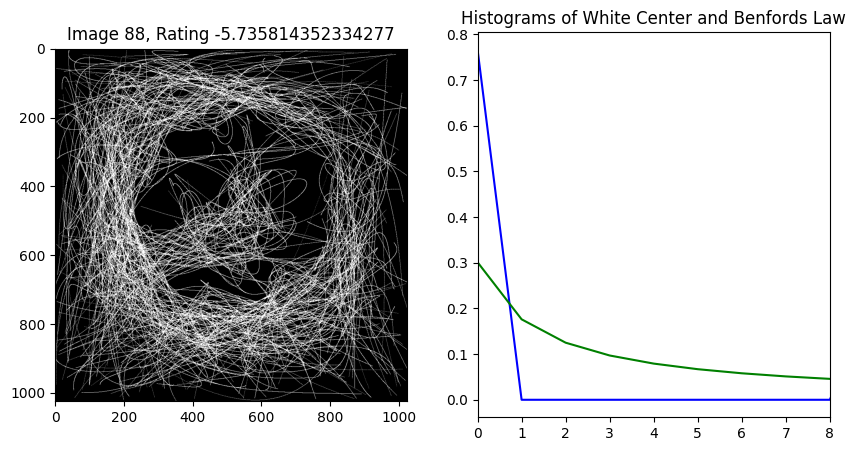

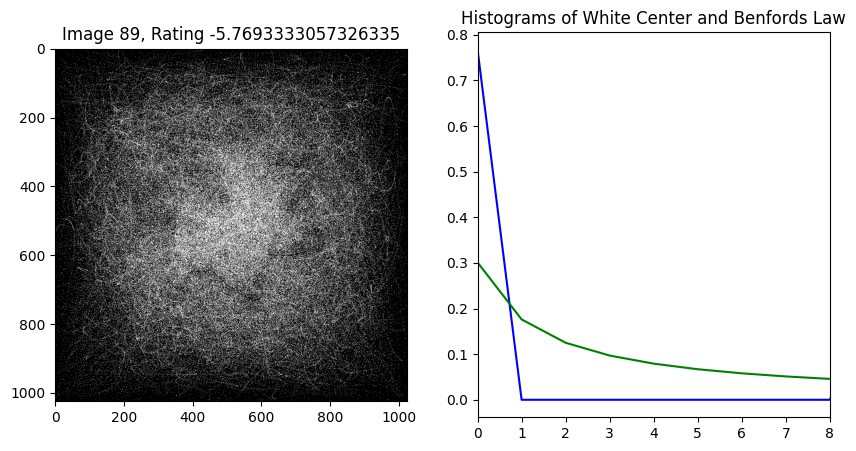

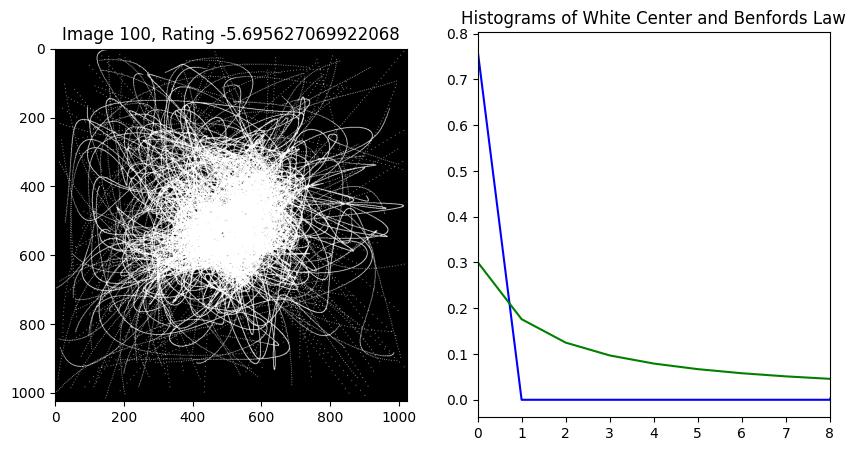

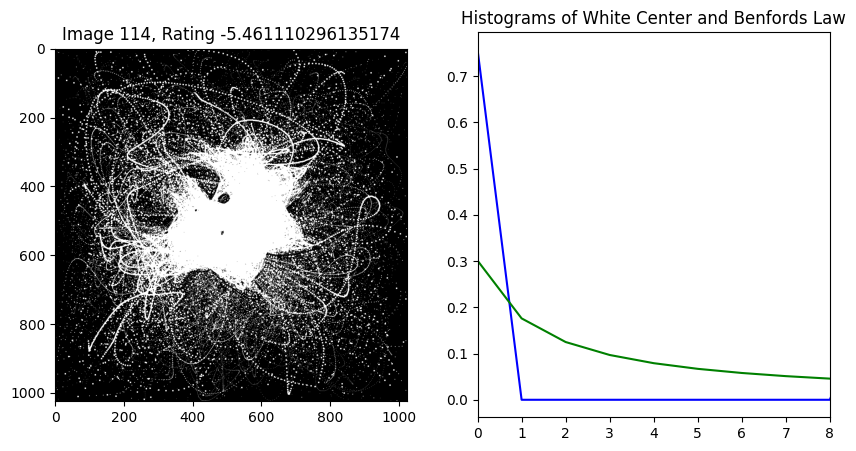

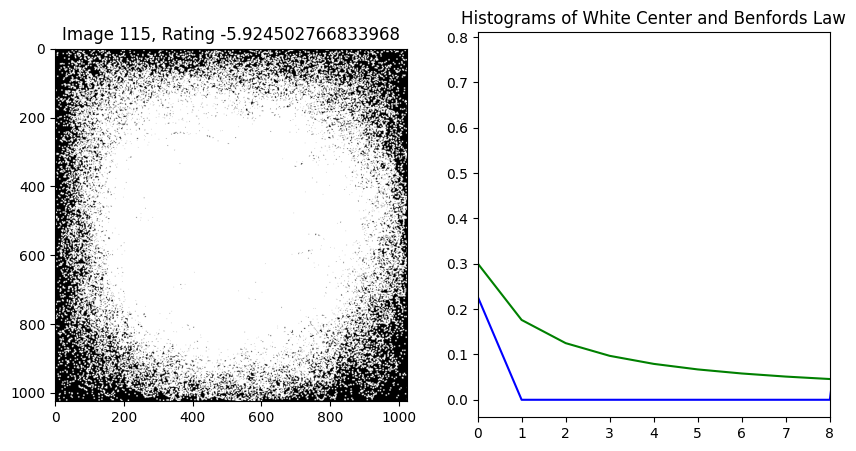

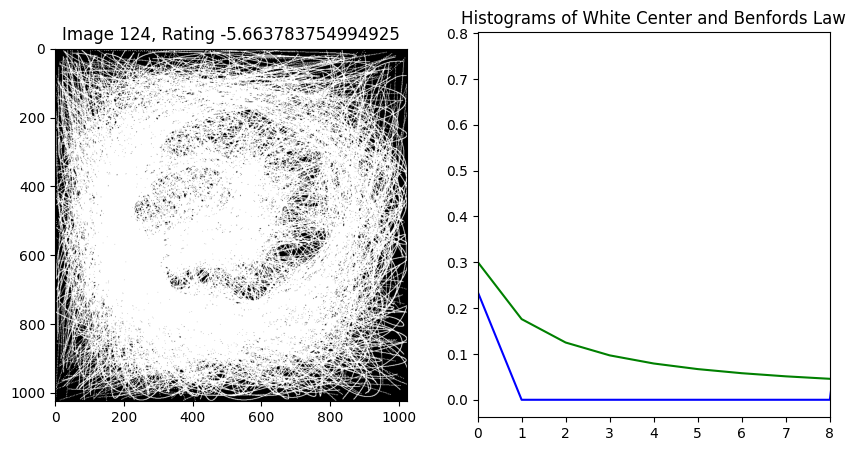

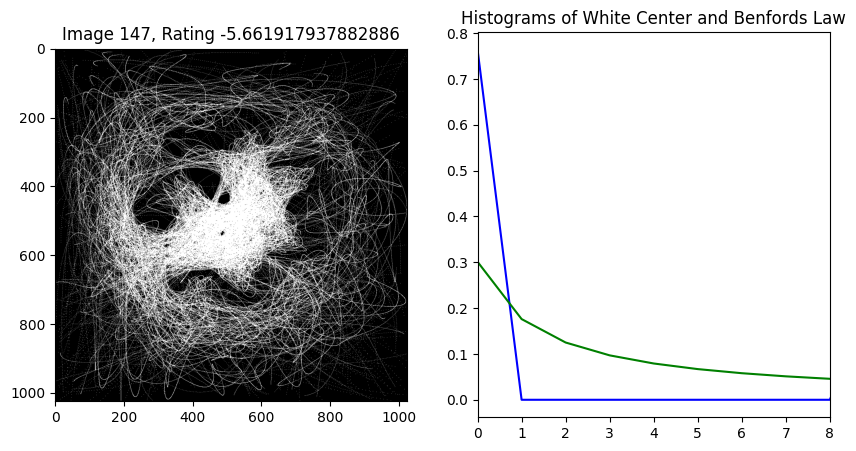

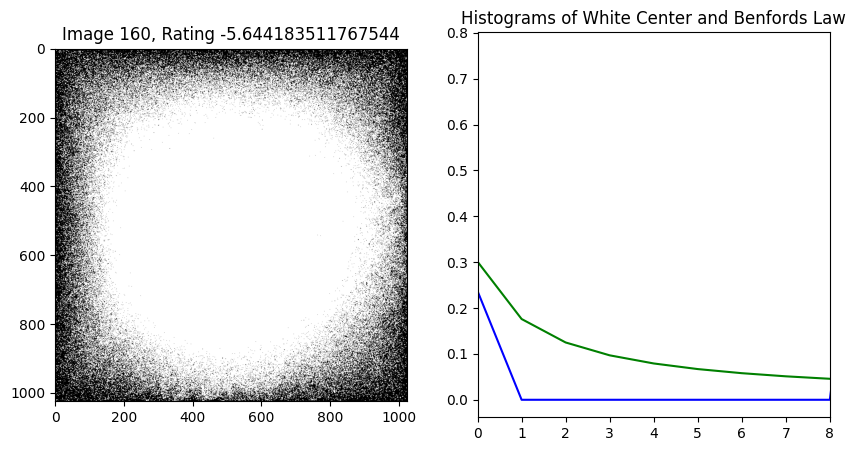

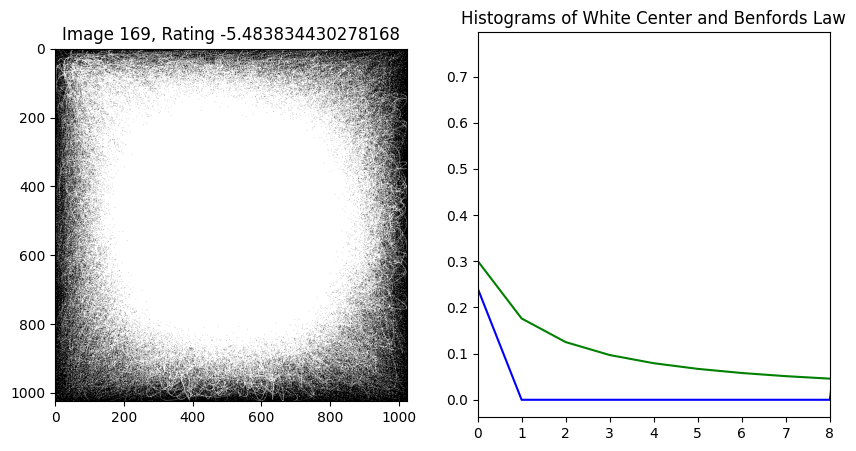

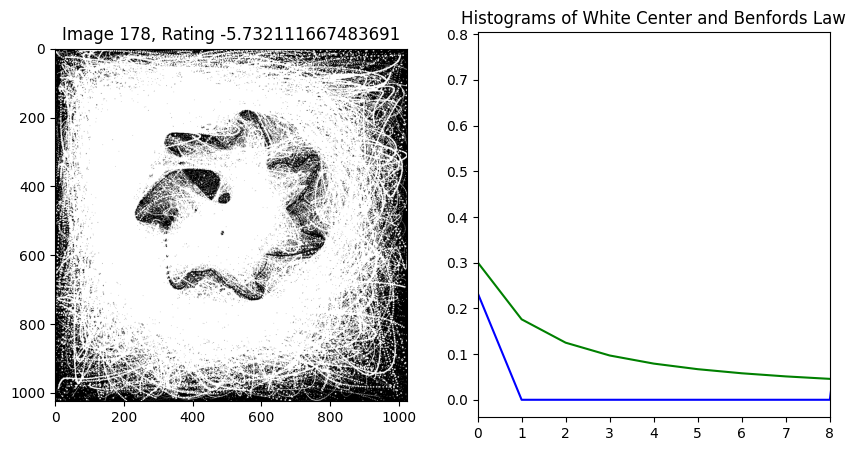

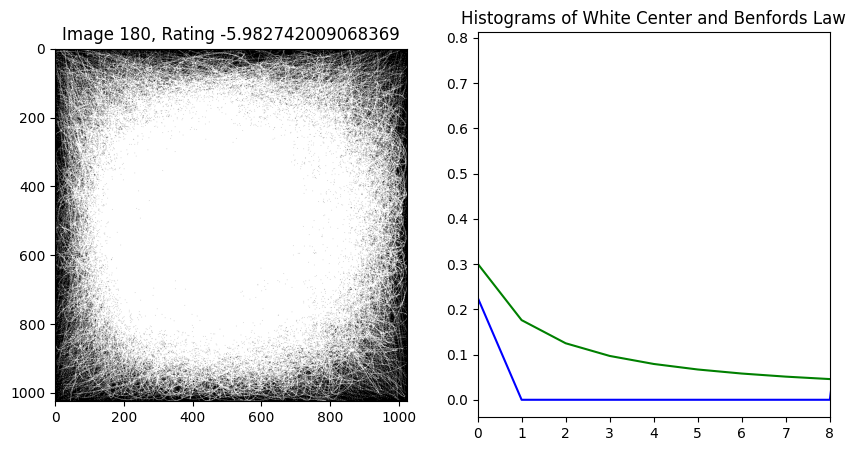

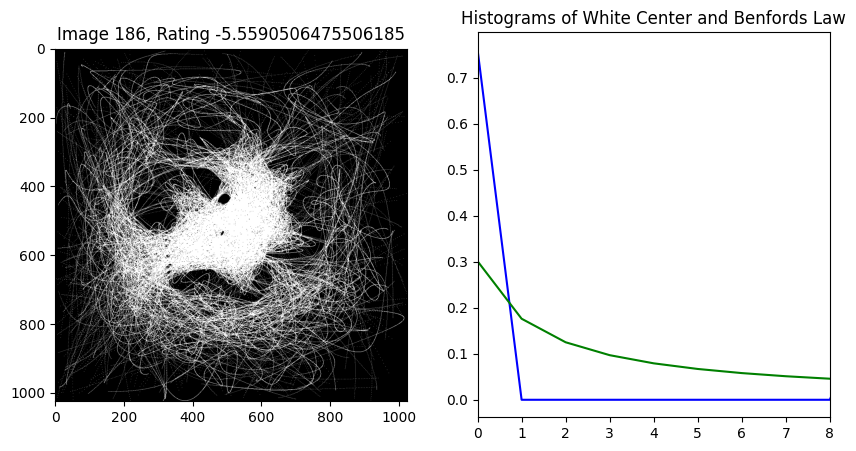

In [246]:
for i, rating in enumerate(ratings):
    if -6 <= rating["rating"] <= -5:
        img = cv.imread(f"./random-tries/{int(i + 1)}.png")

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(f'Image {int(i + 1)}, Rating {rating["rating"]}')

        plt.subplot(1, 2, 2)
        plt.plot(rating["hist"], color='blue')
        plt.plot(hist_bl, color='green')
        plt.title(f"Histograms of White Center and Benfords Law")
        plt.xlim([0, 8])

        plt.show()

In [247]:
import json
import csv
import os

# Set the directory path
directory_path = '/Users/michalryngier/studia/praca-magisterska/art/ratings/random-tries'

# Create a CSV file for writing
csv_file_path = '/Users/michalryngier/studia/praca-magisterska/art/ratings/ratings.csv'
csv_headers = ['L.p.', 'crossoverChance', 'mutationChance', 'numberOfMixes', 'nofPointsMax', 'nofPointsMin',
               'thicknessMax', 'thicknessMin', 'divider', 'size']

with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Write the CSV headers
    csv_writer.writerow(csv_headers)

    # Loop through JSON files and extract data
    for i in range(1, number_of_files + 1):  # Assuming files are named from 1.json to 223.json
        json_file_path = os.path.join(directory_path, f'{i}.json')

        if os.path.exists(json_file_path):
            with open(json_file_path, 'r') as json_file:
                data = json.load(json_file)

                # Extract relevant data
                row_data = [
                    str(i),  # L.p.
                    data['crossoverChance'],
                    data['mutationChance'],
                    data['numberOfMixes'],
                    data['populationConfig']['nofPointsMax'],
                    data['populationConfig']['nofPointsMin'],
                    data['populationConfig']['thicknessMax'],
                    data['populationConfig']['thicknessMin'],
                    data['populationConfig']['divider'],
                    data['populationConfig']['size']
                ]

                # Write the data to CSV
                csv_writer.writerow(row_data)

print(f'CSV file created at: {csv_file_path}')

CSV file created at: /Users/michalryngier/studia/praca-magisterska/art/ratings/ratings.csv


In [248]:
# Set the directory path
directory_path = '/path/to/your/json/files'

# Load the existing CSV file
existing_csv_path = '/Users/michalryngier/studia/praca-magisterska/art/ratings/ratings.csv'
updated_csv_path = '/Users/michalryngier/studia/praca-magisterska/art/ratings/ratings_with_benford.csv'

# Create a new CSV file for writing the updated data
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)

    # Add 'Benford' to the headers
    headers.append('Benford')

    # Create a new CSV file for writing the updated data
    with open(updated_csv_path, 'w', newline='') as updated_csv_file:
        csv_writer = csv.writer(updated_csv_file)

        # Write the updated headers to the new CSV file
        csv_writer.writerow(headers)

        # Loop through rows and update data
        for row, rating_dict in zip(csv_reader, ratings):
            # Extract the "rating" value from the dictionary
            benford_value = rating_dict.get("rating", None)

            # Append the Benford value to the row
            row.append(benford_value)

            # Write the updated row to the new CSV file
            csv_writer.writerow(row)

print(f'Updated CSV file created at: {updated_csv_path}')

Updated CSV file created at: /Users/michalryngier/studia/praca-magisterska/art/ratings/ratings_with_benford.csv
